In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import ast

# setting plots theme
sns.set_theme(style="ticks")

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate median salary for top 6 jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [2]:
# Filtered data containing not null values for salary_year_avg
df_filtered = df.dropna(subset=["salary_year_avg"])

In [3]:
# most posted jobs
job_titles = df_filtered["job_title_short"].value_counts().head(6).index.to_list()

In [4]:
# Selecting only most posted posts
df_filtered = df_filtered[df_filtered["job_title_short"].isin(job_titles)]

In [5]:
# ordering job titles based on median salary in decending order
ordered_titles = df_filtered.groupby("job_title_short")["salary_year_avg"].agg("median").sort_values(ascending=False).index.tolist()

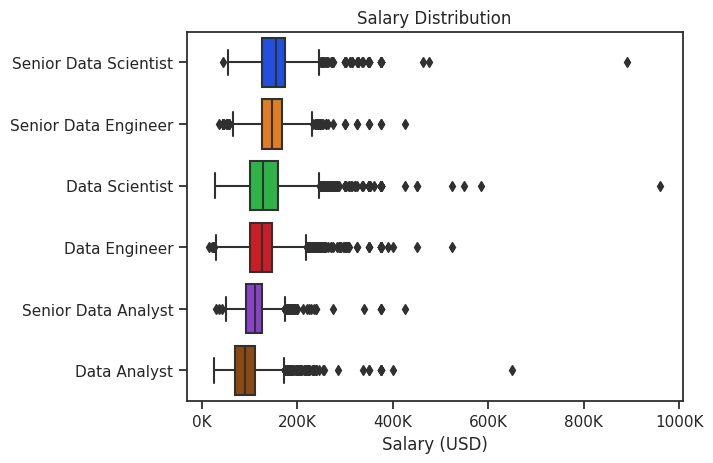

In [6]:
fig, ax = plt.subplots()
sns.boxplot(data=df_filtered, x="salary_year_avg", y="job_title_short", palette="bright", order=ordered_titles, ax=ax)
ax.set_title("Salary Distribution")
ax.set_ylabel("")
ax.set_xlabel("Salary (USD)")
ax.xaxis.set_major_formatter(lambda x,pos:f"{int(x/1000)}K")
plt.show()

# Investigate Median Salary Vs Skill for Data Analyst
#### Doing it for all roles altogether

In [15]:
data = df.explode(column=["job_skills"]).copy()

(3777320, 17)

In [16]:
data = data.dropna(subset=["salary_year_avg"])

In [20]:
data_skills = data.groupby(["job_skills"])["salary_year_avg"].agg(["count", "median"])

In [46]:
df_top_skills = data_skills.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False)
df_top_paying_skills = data_skills.sort_values(by="median", ascending=False).head(10)

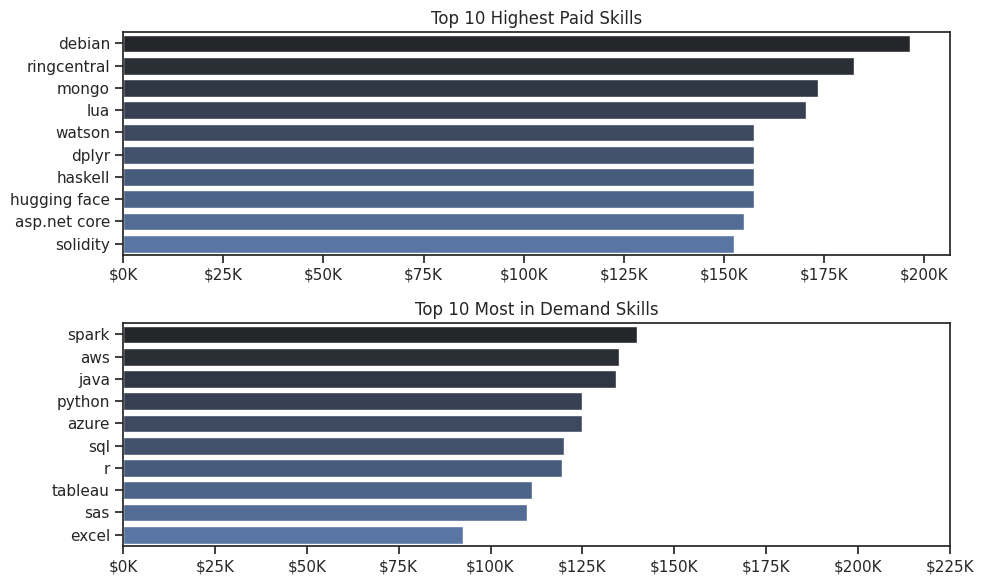

In [69]:
fig, ax = plt.subplots(2, figsize=(10,6))
sns.barplot(data=df_top_paying_skills, x="median", y=df_top_paying_skills.index,palette="dark:b", ax=ax[0])
ax[0].set_title("Top 10 Highest Paid Skills")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(lambda x,pos: f"${int(x/1000)}K")

sns.barplot(data=df_top_skills, x="median", y=df_top_skills.index, palette="dark:b", ax=ax[1])
ax[1].set_title("Top 10 Most in Demand Skills")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_xticks(ax[0].get_xticks())
ax[1].xaxis.set_major_formatter(lambda x, pos: f"${int(x/1000)}K")
fig.tight_layout()
plt.show()